## Decision Trees

Classification & Regression Trees (CART)

<img src="https://littleml.files.wordpress.com/2013/03/iris_dataset_model.jpg">

<img src="https://www.evernote.com/l/AUVOiUntlxZHM60VXN8WZWzg83pzEIL-XJwB/image.png" width="50%">

Building Trees Rigorously (Node Splitting Criteria)

<img src="https://www.evernote.com/l/AUVA6K4mqnhOMoNcy93La3lFe5XOAxgaWrUB/image.png">

# Collections of Trees ("Decision Forests", "Random Forests")

<img src="https://contentmamluswest001.blob.core.windows.net/content/14b2744cf8d6418c87ffddc3f3127242/9502630827244d60a1214f250e3bbca7/b729c21014a34955b20fa94dc13390e5/image">

### Classifying NIST Handwritten Digits

We will try to classify handwritten digits (0-9) from their raw pixelated images.

Each image is 8x8 pixels.  We will not do any feature extraction and instead classify based on the intensity values for each pixel.

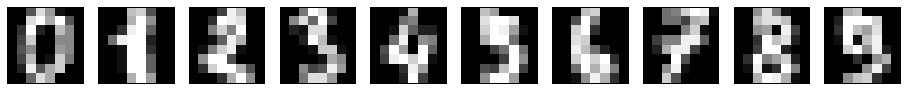

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
# import NIST digits data set (1797 8x8 images)
digits = datasets.load_digits()

f,axs = plt.subplots(1,10,figsize=(16, 6))
objarr = np.empty_like(axs)
for n, ax in enumerate(axs.flat):
    objarr.flat[n] = ax.imshow(digits['images'][n], cmap='gray', interpolation='nearest')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

$\textbf{Now we split the data into a training and testing set.}$

$\textbf{We will only fit the classifier on the training set and use the testing set to evaluate performance.}$

In [7]:
# take the first 500 as training
train = 500
Xtr = digits['data'][:train]
Ytr = digits['target'][:train]
print("training size: " + str(len(Ytr)))

# testing set
Xte = digits['data'][train:]
Yte = digits['target'][train:]
print("testing size: " + str(len(Yte)))

training size: 500
testing size: 1297


### Fit a Random Forest Classifier

In [75]:
# Create a classifier: 
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier object
classifier = RandomForestClassifier(n_estimators=30)

# fit the classification model on training set
classifier.fit(Xtr, Ytr)

# make predictions for testing set
pred_rf = classifier.predict(Xte) 

print("True Class / Predicted class")
print(np.vstack((Yte[0:10],pred_rf[0:10])))

True Class / Predicted class
[[8 2 2 5 7 9 5 4 8 8]
 [8 2 2 5 7 9 5 4 8 8]]


http://cs.stanford.edu/people/karpathy/svmjs/demo/demoforest.html

## Error Estimation

Q: What evaluation metrics are available?

<b>Loss Functions</b>

- `metrics.zero_one(y_true, y_pred)`
Zero-One classification loss
- `metrics.hinge_loss(y_true, pred_decision[, ...])`
Cumulated hinge loss (non-regularized).
- `metrics.mean_square_error(y_true, y_pred)`
Mean square error regression loss

<b>Score Functions</b>

- `metrics.zero_one_loss(y_true, y_pred)`
Zero-One classification score
- `metrics.auc(x, y)`
Compute Area Under the Curve (AUC)
- `metrics.precision_score(y_true, y_pred[, ...])`
Compute the precision
- `metrics.recall_score(y_true, y_pred[, pos_label])`
Compute the recall
- `metrics.fbeta_score(y_true, y_pred, beta[, ...])`
Compute fbeta score
- `metrics.f1_score(y_true, y_pred[, pos_label])`
Compute f1 score

<b>Evaluation Plots</b>
- `metrics.confusion_matrix(y_true, y_pred[, ...])` Compute confusion matrix to evaluate the accuracy of a classification
- `metrics.roc_curve(y_true, y_score)` Compute Receiver operating characteristic (ROC)
- `metrics.precision_recall_curve(y_true, ...)` Compute precision-recall pairs for different probability thresholds

In [76]:
# compute zero-one loss / score & confusion matrix
from sklearn import metrics

rf_01 = metrics.zero_one_loss(Yte, pred_rf) # zero-one loss
rf_01_score = metrics.accuracy_score(Yte, pred_rf) # zero-one score
rf_confmat = metrics.confusion_matrix(Yte, pred_rf) # conf mat

print("Zero-One Loss: " + str(rf_01))
print("Zero-One Score: " + str(rf_01_score))
print("Confusion Matrix:")
print("[i, j] is the # of objects truly in group i but predicted to be in group j")
print(rf_confmat)

Zero-One Loss: 0.120277563608
Zero-One Score: 0.879722436392
Confusion Matrix:
[i, j] is the # of objects truly in group i but predicted to be in group j
[[125   0   0   0   2   0   0   0   0   0]
 [  0 105   8   3   2   2   3   0   7   0]
 [  1   1 115   5   0   0   0   1   1   3]
 [  0   0   2 109   0   2   0   1  10   6]
 [  0   0   0   0 118   1   1   9   0   3]
 [  4   0   0   0   3 106   4   0   1  14]
 [  2   0   0   0   0   0 128   0   0   0]
 [  0   1   0   0   1   0   0 124   2   1]
 [  1   7  11   1   1   2   2   1  98   4]
 [  1   9   0   2   0   4   0   2   1 113]]


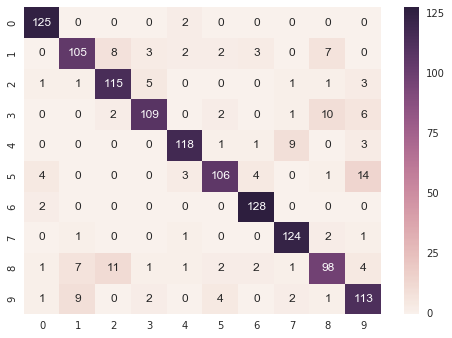

In [77]:
import seaborn as sns
sns.heatmap(rf_confmat, annot=True,  fmt='', xticklabels=[str(x) for x in range(10)], yticklabels=[str(x) for x in range(10)]);

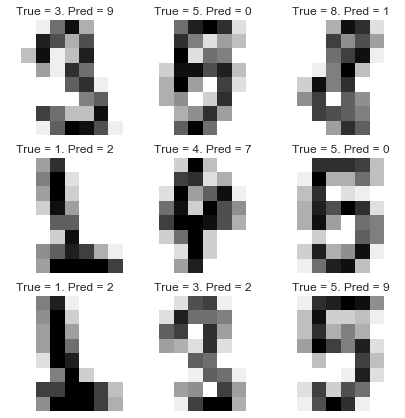

In [78]:
# plot some digits that we get wrong
wrong = np.where(pred_rf != Yte)[0][:9]

f,axs = plt.subplots(3,3,figsize=(7, 7))
objarr = np.empty_like(axs)

for n, ax in enumerate(axs.flat):
    objarr.flat[n] = ax.imshow(np.reshape(Xte[wrong[n]],(8,8)).astype(int),
                              cmap='gray_r', interpolation='nearest')
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title("True = " + str(int(Yte[wrong[n]])) +". Pred = " + str(int(pred_rf[wrong[n]])))

In [79]:
# compute precision and recall
# Note: precision & recall are for 2-class; multi-class returns weighted avg. prec/recall

rf_precision = metrics.precision_score(Yte, pred_rf,average="weighted") # TP / (TP + FP)
rf_recall = metrics.recall_score(Yte, pred_rf,average="weighted") # TP / (TP + FN)

print("Avg. Precision: ",rf_precision)
print("Avg. Recall: ", rf_recall)

Avg. Precision:  0.880311203852
Avg. Recall:  0.879722436392


In [80]:
len(pred_rf_prob[:,1])

1297

AUC for digit=5: 0.991178956951


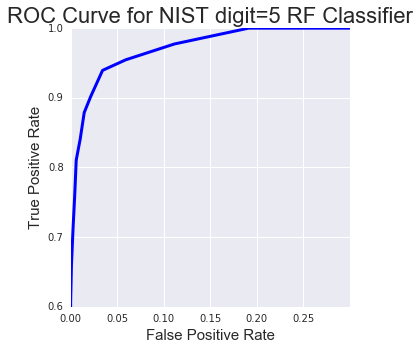

In [83]:
#  ROC curve, AUC for RF classifier using digit = 1
digit = 5
Yte_1 = list(map(lambda x: x == digit and 1. or 0.,Yte)) # does Y = digit

pred_rf_prob = classifier.predict_proba(Xte) 

pred_rf_prob_1 = pred_rf_prob[:,digit]
fpr, tpr, thresholds = metrics.roc_curve(Yte_1, pred_rf_prob_1)

f, ax = plt.subplots(1,1,figsize=(5, 5))
ax.plot(fpr,tpr,'b-',linewidth=3)
ax.set_xlim([0.,0.3])
ax.set_ylim([0.6,1.0005])
ax.set_xlabel("False Positive Rate",size=15)
ax.set_ylabel("True Positive Rate",size=15)
ax.set_title("ROC Curve for NIST digit={} RF Classifier".format(digit),size=22)
print("AUC for digit={}: ".format(digit) + str(metrics.auc(fpr,tpr)))

$\textbf{Tuning the Classifier}$  
======================================================

For now we have used an RF classifier with the choice of `n_estimators` and the default parameters.

Q: How do I choose which model and (hyper) parameters to use?

 - KNN with what # of neighbors?
 - SVM which what kernel & bandwidth?
 - RF with how many estimators and which max_features?
 - GP with what kernel & bandwidth?
 
**Solution: use `grid_search.GridSearchCV`**:
`grid_search.GridSearchCV(estimator, param_grid, loss_func, n_jobs, cv=None)`

Computes cv-fold cross-validated loss_func (or score_func) of estimator over a param_grid on n_jobs cores, and returns the best model!

Let's see how we can rigorously find the optimal model using cross-validation and grid search.

In [120]:
# Find the best Random Forest classifier
from sklearn import grid_search
from sklearn.ensemble import RandomForestClassifier

import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# explore 3 different forest sizes and 3 choices of mtry
parameters = {'n_estimators':[20,50,100],  'max_features':[8,10,'auto'], 
             'criterion': ['gini','entropy']}
rf_tune = grid_search.GridSearchCV(RandomForestClassifier(), parameters, 
                                   n_jobs = -1, cv = 5,verbose=1)
rf_opt = rf_tune.fit(Xtr, Ytr)

print("Best zero-one score: " + str(rf_opt.best_score_) + "\n")
print("Optimal Model:\n" + str(rf_opt.best_estimator_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.4s finished


Best zero-one score: 0.94

Optimal Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [93]:
rf_opt.best_params_

{'criterion': 'entropy', 'max_features': 8, 'n_estimators': 100}

## Breakout 2

Breakout
Classify the famous Iris data, first used by R.A Fisher. 
To load in the data and split into training / testing sets:

1. Choose your favorite classification model.  
2. Find the parameters that minimize the 3-fold cross-validation misclassification rate over the training set.  
3. Apply this optimized model to predict the class of each object in the held-out set.  

a) What is your best 3-fold CV 0-1 score?

b) What is your 0-1 score when applying it to testing set? 

In [131]:
%matplotlib inline
feature_importances = rf_opt.best_estimator_.feature_importances_
feature_importances = feature_importances.reshape(8,8)
print(feature_importances.shape)

(8, 8)


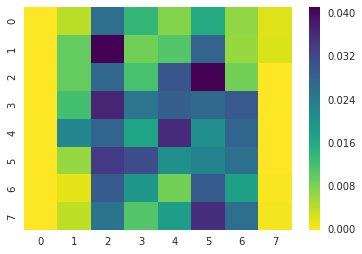

In [138]:
sns.heatmap(feature_importances, cmap=plt.cm.viridis_r)

In [4]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data']
Y = digits['target']

clf = RandomForestClassifier()
rfe = RFE(estimator=clf, n_features_to_select=1, step=1)
rfe.fit(X, Y)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=0)

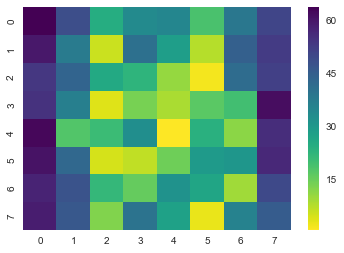

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

ranking = rfe.ranking_.reshape(digits.images[0].shape)
sns.heatmap(ranking, cmap=plt.cm.viridis_r)

In [94]:
!pip install tpot

    100% |████████████████████████████████| 1.1MB 201kB/s 
    100% |████████████████████████████████| 860kB 299kB/s 
  Running setup.py bdist_wheel for tpot ... - \ | / - \ done
  Stored in directory: /Users/jbloom/Library/Caches/pip/wheels/42/9b/a1/2e5eb2583eeb4e116398370458491bf4c7c91f619fbfa16dd4
  Running setup.py bdist_wheel for deap ... - \ | / - \ done
  Stored in directory: /Users/jbloom/Library/Caches/pip/wheels/c9/9c/cd/d52106f0148e675df35718c0efff2ecf03cc86d5bdcfb91db5
Successfully built tpot deap


<img src="https://raw.githubusercontent.com/rhiever/tpot/master/images/tpot-logo.jpg" width="30%"> 

Consider TPOT your Data Science Assistant. TPOT is a Python tool that automatically creates and optimizes machine learning pipelines using genetic programming.

<img src="https://raw.githubusercontent.com/rhiever/tpot/master/images/tpot-ml-pipeline.png">

In [96]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')

Optimization Progress:  17%|█▋        | 20/120 [00:00<01:06,  1.50pipeline/s]

Generation 1 - Current best internal CV score: 0.9796153846153844


Optimization Progress:  32%|███▏      | 38/120 [00:00<00:40,  2.02pipeline/s]

Generation 2 - Current best internal CV score: 0.9796153846153847


Optimization Progress:  47%|████▋     | 56/120 [00:00<01:21,  1.28s/pipeline]

Generation 3 - Current best internal CV score: 0.986111111111111


Optimization Progress:  65%|██████▌   | 78/120 [00:00<01:56,  2.77s/pipeline]

Generation 4 - Current best internal CV score: 0.986111111111111


Optimization Progress:  83%|████████▎ | 100/120 [00:00<00:40,  2.01s/pipeline]

Generation 5 - Current best internal CV score: 0.9930555555555555



Best pipeline: RandomForestClassifier(Nystroem(input_matrix, 37, 0.45000000000000001, 10))
0.959826438993


In [97]:
!cat tpot_iris_pipeline.py

import numpy as np

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer

# NOTE: Make sure that the class is labeled 'class' in the data file
tpot_data = np.recfromcsv('PATH/TO/DATA/FILE', delimiter='COLUMN_SEPARATOR', dtype=np.float64)
features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
training_features, testing_features, training_classes, testing_classes = \
    train_test_split(features, tpot_data['class'], random_state=42)

exported_pipeline = make_pipeline(
    Nystroem(gamma=0.45, kernel="cosine", n_components=10),
    RandomForestClassifier(n_estimators=500)
)

exported_pipeline.fit(training_features, training_classes)
results = exported_pipeline.predict(testing_features)
